<a href="https://colab.research.google.com/github/arbouria/Notas-Aprendizaje-y-Comportamiento-Adaptable-I/blob/main/doc/notebooks/interactive_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyDDM online demo

This is an interactive demo of a GDDM with leaky integration and exponentially collapsing bounds.

This demo can be run like a normal Jupyter notebook.  If you've never used Jupyter notebooks before, hover over both headings below ("Install PyDDM on Google Colab" and "Define the model and run the GUI") and press the play button on each.  An interactive demo will show below.  To make changes to the model and try out your changes, click on "Show code" and edit it.  When you are done, click on the play button again to update the demo.

In [ ]:
#@title Install PyDDM on Google Colab
!pip -q install git+https://github.com/mwshinn/PyDDM

In [ ]:
#@title Define the model and run the GUI
import pyddm
import pyddm.plot
import numpy as np
model = pyddm.gddm(drift=lambda x,leak,driftrate : driftrate - x*leak,
                   noise=1,
                   bound=lambda t,initial_B,collapse_rate : initial_B * np.exp(-collapse_rate*t),
                   starting_position="x0",
                   parameters={"leak": (0, 2),
                               "driftrate": (-3, 3),
                               "initial_B": (.5, 1.5),
                               "collapse_rate": (0, 10),
                               "x0": (-.9, .9)})

pyddm.plot.model_gui_jupyter(model)
# pyddm.plot.model_gui(model) # If not using a Jupyter notebook or Google Colab

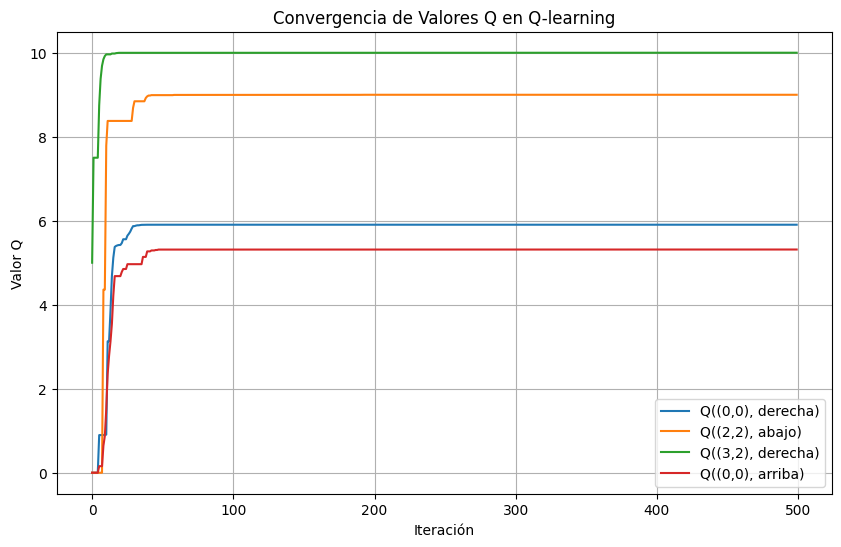


Política Óptima Aprendida:
 →  ↓  ↓  ↓ 
 →  ↓  ↓  ↓ 
 ↓  ↓  →  ↓ 
 →  →  →  R 

Tabla Q Final (Valores Redondeados):
[[[ 5.31  5.9   5.31  5.9 ]
  [ 5.9   6.56  5.31  6.56]
  [ 5.68  7.29  5.9   5.38]
  [ 0.18  7.73  2.6   0.  ]]

 [[ 5.31  6.56  5.88  6.56]
  [ 5.9   7.29  5.9   7.29]
  [ 6.51  8.1   6.56  7.96]
  [ 2.63  9.    6.95  7.43]]

 [[ 5.86  7.29  5.66  7.29]
  [ 6.56  8.1   6.56  8.1 ]
  [ 7.29  9.    7.29  9.  ]
  [ 8.08 10.    8.06  8.68]]

 [[ 6.5   7.25  7.25  8.1 ]
  [ 7.29  8.1   7.29  9.  ]
  [ 8.1   9.    8.1  10.  ]
  [ 0.    0.    0.    0.  ]]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de Q-learning
alpha = 0.5  # Tasa de aprendizaje
gamma = 0.9  # Factor de descuento
epsilon_initial = 0.9  # Probabilidad inicial de exploración
epsilon_decay = 0.99  # Factor de decaimiento de epsilon
epsilon_min = 0.05  # Probabilidad mínima de exploración
num_iteraciones = 500  # Número total de iteraciones de entrenamiento

# Configuración del entorno (rejilla 4x4)
grid_size = 4
recompensa = (3, 3)  # Coordenadas (fila, columna) de la recompensa

# Inicializar la tabla Q (estado, acción)
#   - Dimensiones: (grid_size, grid_size, 4)
#   - 4 acciones posibles: 0=arriba, 1=abajo, 2=izquierda, 3=derecha
Q = np.zeros((grid_size, grid_size, 4))

# Función para elegir una acción (política epsilon-greedy)
def elegir_accion(estado, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(4)  # Acción aleatoria (exploración)
    else:
        return np.argmax(Q[estado])  # Mejor acción según la tabla Q (explotación)

# Función para actualizar el valor Q de un par estado-acción
def actualizar_Q(estado, accion, recompensa, nuevo_estado):
    mejor_Q_futuro = np.max(Q[nuevo_estado])
    Q[estado][accion] = Q[estado][accion] + alpha * (recompensa + gamma * mejor_Q_futuro - Q[estado][accion])

# Diccionario para almacenar el historial de los valores Q que queremos graficar
q_historial = {
    "Q((0,0), derecha)": [],
    "Q((2,2), abajo)": [],
    "Q((3,2), derecha)": [],
    "Q((0,0), arriba)": []
}

# Bucle principal de entrenamiento de Q-learning
epsilon = epsilon_initial  # Inicializar epsilon
for iteracion in range(num_iteraciones):
    estado = (0, 0)  # Comenzar en la esquina superior izquierda (estado inicial)
    terminado = False

    while not terminado:
        # 1. Elegir una acción usando la política epsilon-greedy
        accion = elegir_accion(estado, epsilon)

        # 2. Simular el movimiento del agente (en este caso, sin trampas)
        if accion == 0:  # Mover hacia arriba
            nuevo_estado = (max(0, estado[0] - 1), estado[1])
        elif accion == 1:  # Mover hacia abajo
            nuevo_estado = (min(grid_size - 1, estado[0] + 1), estado[1])
        elif accion == 2:  # Mover hacia la izquierda
            nuevo_estado = (estado[0], max(0, estado[1] - 1))
        else:  # Mover hacia la derecha
            nuevo_estado = (estado[0], min(grid_size - 1, estado[1] + 1))

        # 3. Obtener la recompensa (si el nuevo estado es la meta)
        if nuevo_estado == recompensa:
            recompensa_actual = 10
            terminado = True  # Terminar el episodio si se alcanza la recompensa
        else:
            recompensa_actual = 0

        # 4. Actualizar el valor Q del par estado-acción anterior
        actualizar_Q(estado, accion, recompensa_actual, nuevo_estado)

        # 5. Transición al nuevo estado
        estado = nuevo_estado

    # Guardar los valores Q actuales para la gráfica
    q_historial["Q((0,0), derecha)"].append(Q[0, 0, 3])
    q_historial["Q((2,2), abajo)"].append(Q[2, 2, 1])
    q_historial["Q((3,2), derecha)"].append(Q[3, 2, 3])
    q_historial["Q((0,0), arriba)"].append(Q[0, 0, 0])

    # Decaimiento de epsilon (reducir la exploración con el tiempo)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Crear la gráfica de convergencia de los valores Q
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar la evolución de cada valor Q seleccionado
for label, valores in q_historial.items():
    plt.plot(valores, label=label)

plt.xlabel("Iteración")  # Etiqueta del eje x
plt.ylabel("Valor Q")  # Etiqueta del eje y
plt.title("Convergencia de Valores Q en Q-learning")  # Título de la gráfica
plt.legend()  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula
plt.show()  # Mostrar la gráfica

# --- (Opcional) Mostrar la política óptima aprendida ---

# Función para visualizar la política óptima
def mostrar_politica_optima(Q):
  politica = np.argmax(Q, axis=2) #Encuentra la acción con mayor Q
  acciones_dict = {0: "↑", 1: "↓", 2: "←", 3: "→"} #Para imprimir flechas

  for i in range(grid_size):
    fila_str = ""
    for j in range(grid_size):
      if (i,j) == recompensa:
        fila_str += " R " #Celda de recompensa
      else:
        fila_str += f" {acciones_dict[politica[i,j]]} "
    print(fila_str)


print("\nPolítica Óptima Aprendida:")
mostrar_politica_optima(Q)

# --- (Opcional) Imprimir la tabla Q final ---
print("\nTabla Q Final (Valores Redondeados):")
print(np.round(Q, 2))